#### Wine Quality Prediction

Hello and welcome. This is my second Kernel which serves as my personal notes in doing the machine learning exercise. The aim is to be able to acquire skills to perform Machine Learning and Data Science work. 
In today's exercise, I will be working with wine quality dataset, perform some exploratory data analysis and eventually create a machine learning that will predict wine quality.

#### Import the libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Load the White Wine Dataset

In [36]:
white_wine = pd.read_csv('winequality-white.csv')

In [37]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


The dependent variable is the **quality** while the features or the independent variables are as follows:<br></br>
* fixed acidity<br></br>
* volatile acidity<br></br>
* citric acid<br></br>
* residual sugar<br></br>
* chlorides<br></br>
* free sulfur dioxide<br></br>
* total sulfur dioxide<br></br>
* density<br></br>
* pH<br></br>
* sulphates<br></br>
* alcohol<br></br>

Next step is to run the pandas **info()** method to check the datatypes of each columns. It will also give us the numnber of entries per columns. 

In [38]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


**Observations**
* No missing data
* All columns are numeric

Another way to check if a column has a missing value or if a column contain a null value is to use the isnull method. To get the total count of null value or the missing data we will combine the **isnull()** method with the **sum()** method.

In [40]:
white_wine.apply(lambda x: sum(x.isnull()), axis=0)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Now, lets examine the unique values we have for **quality**

In [43]:
white_wine['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [44]:
white_wine['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

Let's do a count plot to visualize the above data

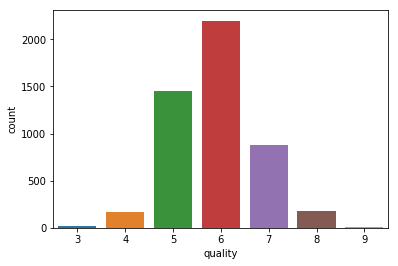

In [10]:
sns.countplot(x='quality', data=white_wine)

There 6 wine quality values based from the results above. Minimum is 3 and maximum is 9. We can create 3 wine quality categories namely **poor quality**, **normal quality**, **excellent quality**.

* if quality < 6 - **poor quality**
* if quality = 6 - **normal quality**
* if quality > 6 - **excellent quality**

In [45]:
def classify_wine_quality(quality):
    if quality < 6:
        return 'poor quality'
    elif quality == 6:
        return 'normal quality'
    else:
        return 'excellent quality'
    
white_wine['quality classification'] = white_wine['quality'].apply(classify_wine_quality)

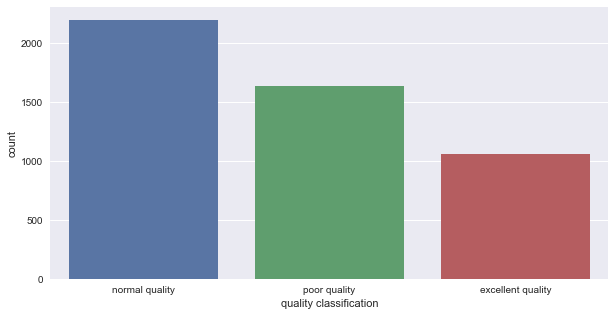

In [52]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x='quality classification', data=white_wine)

#### EDA - Bivariate Analysis
In this section, we will perform the EDA using bivariate analysis. The intention is to get to know how a specific feature affects the quality of wine.

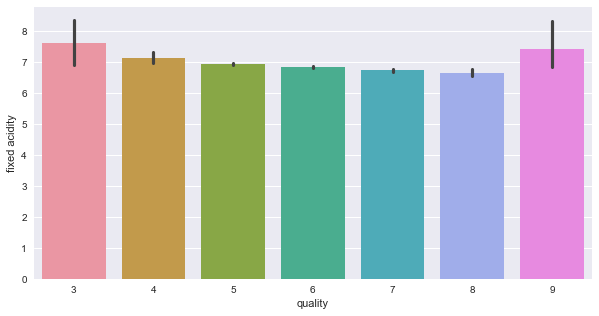

In [53]:
sns.barplot(x='quality', y='fixed acidity', data=white_wine)

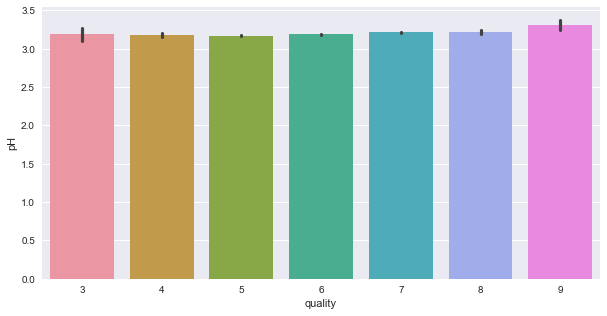

In [112]:
sns.barplot(x='quality', y='pH', data=white_wine)

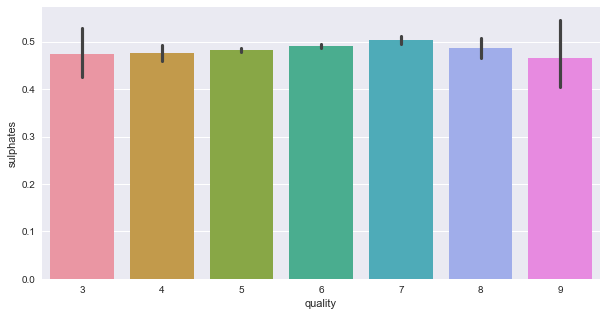

In [113]:
sns.barplot(x='quality', y='sulphates', data=white_wine)

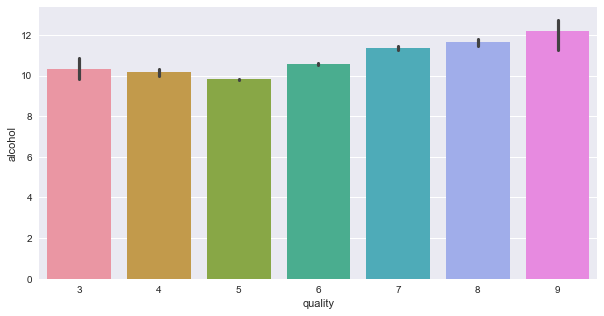

In [56]:
sns.barplot(x='quality', y='alcohol', data=white_wine)

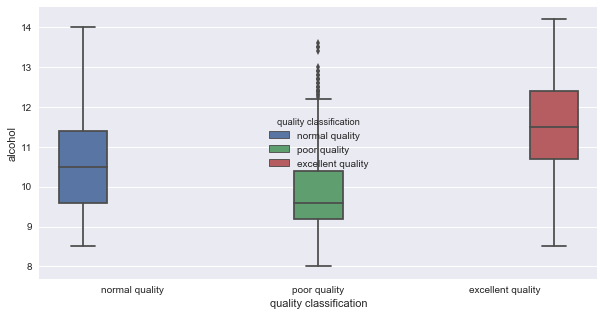

In [68]:
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(y='alcohol', x='quality classification', hue='quality classification', data=white_wine)

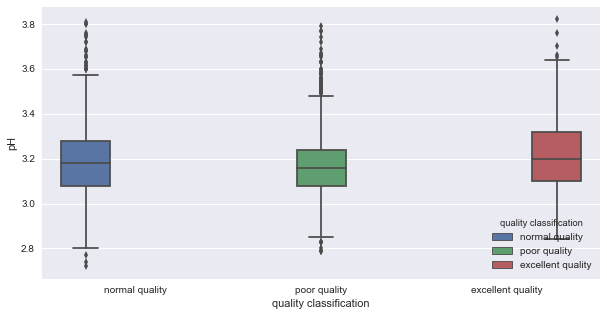

In [76]:
sns.boxplot(y='pH', x='quality classification', data=white_wine, hue='quality classification')

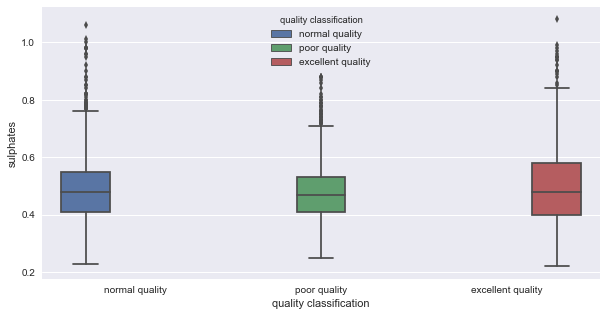

In [70]:
sns.boxplot(y='sulphates', x='quality classification', data=white_wine, hue='quality classification')

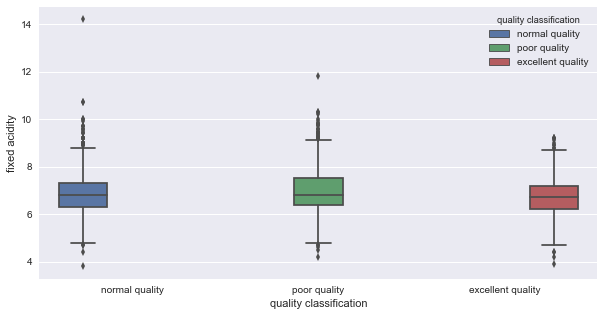

In [71]:
sns.boxplot(y='fixed acidity', x='quality classification', data=white_wine, hue='quality classification')

**Observation from the above plots**
* fixed acidity has no significant effect on quality
* increase in **alcohol** also increases the wine quality
* increase in **sulphates** also increases the wine quality
* increase in **pH** also the wine quality

This observation is also validated by the below correlation of the feature variable with regards to quality

In [74]:
correlation = white_wine.corr()['quality'].drop('quality')
print(correlation.sort_values(kind='quicksort', ascending=False))

alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64


Draw the correlation heatmap

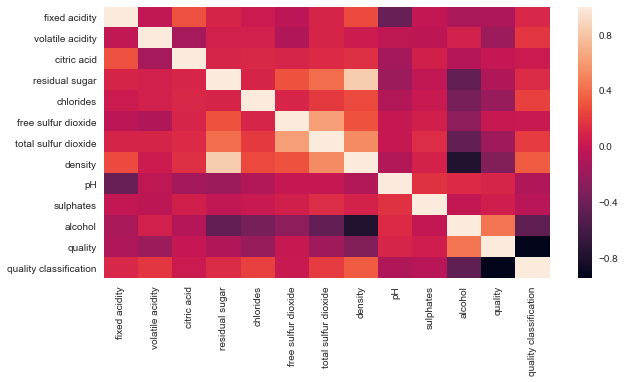

In [115]:
sns.heatmap(white_wine.corr())

In [118]:
def get_features(corr_threshold):
    abs_corr = correlation.abs()
    high_corr = abs_corr[abs_corr > corr_threshold].index.values.tolist()
    
    return high_corr

In [140]:
features = get_features(0.1)
print(features)

['fixed acidity', 'volatile acidity', 'chlorides', 'total sulfur dioxide', 'density', 'alcohol']


#### Create Machine Learning Model

Before we create the model, we will first perform label encode the categoral variable that we have created to classify the wine quality into 3 groups. The LabelEncoder will convert these values into its equivalent numerical values

In [77]:
#use LabelEncoder for the categorigal values
from sklearn.preprocessing import LabelEncoder

In [79]:
le = LabelEncoder()
white_wine['quality classification'] = le.fit_transform(white_wine['quality classification'])
white_wine['quality classification'].dtypes

dtype('int64')

#### Step 1: Import the needed scikit learn libraries

In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

#### Step 2: Divide the dataset into training data and test data

In [98]:
X_train, X_test, y_train, y_test = train_test_split(white_wine.drop(['quality classification', 'quality'], axis=1 ), white_wine['quality classification'], test_size=0.40)

#### Step 3: Create an instance of the Random Forest Classifier Model

In [99]:
rfc = RandomForestClassifier(n_estimators=10)

#### Step 4: Train the Random Forest Classifier Model

In [100]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Step 5: Make Prediction

In [101]:
predictions = rfc.predict(X_test)

In [102]:
print(classification_report(predictions, y_test))

             precision    recall  f1-score   support

          0       0.59      0.63      0.61       419
          1       0.69      0.63      0.66       960
          2       0.67      0.72      0.69       581

avg / total       0.66      0.66      0.66      1960



In [103]:
print(confusion_matrix(predictions, y_test))

[[262 136  21]
 [163 608 189]
 [ 21 141 419]]


There we have it. The the random forest model achieved a 66 % acuracy with the f1-score percentage. This model could be further improve by feature selection or feature engineering. We could also try a different model and compare the results.

In [141]:
outcome = white_wine['quality classification']
X_train, X_test, y_train, y_test = train_test_split(white_wine[features], outcome, test_size=0.30, random_state=101)

In [142]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [143]:
predictions = rfc.predict(X_test)

In [144]:
print(classification_report(predictions, y_test))

             precision    recall  f1-score   support

          0       0.65      0.60      0.62       328
          1       0.68      0.62      0.65       725
          2       0.61      0.72      0.66       417

avg / total       0.65      0.65      0.65      1470

